In [2]:
from google.colab import files
uploaded = files.upload()


Saving sales.csv to sales.csv
Saving sensor_storage_temperature.csv to sensor_storage_temperature.csv
Saving sensor_stock_levels.csv to sensor_stock_levels.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import io
sales_data = pd.read_csv('sales.csv')

sales =sales_data.drop(columns=['Unnamed: 0'])
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: >

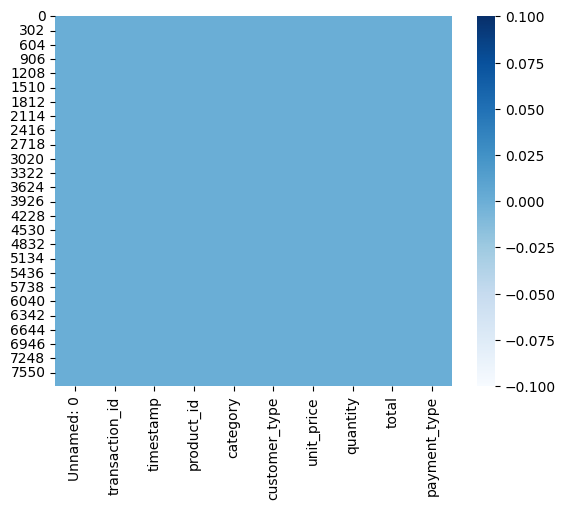

In [6]:
sns.heatmap(sales.isna(), cmap= 'Blues')

data has no missing values

In [10]:
# convert datetime feature to datetime data type
for f in ['timestamp']:
    sales[f] = pd.to_datetime(sales[f], format='%Y-%m-%d %H:%M:%S')

In [11]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


<ipython-input-29-e2eaec8157c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = sales.corr()


<Axes: >

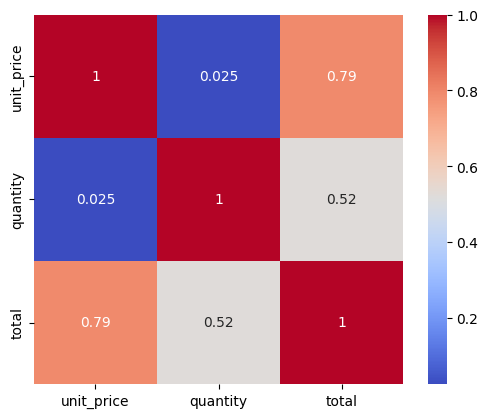

In [29]:
  corr = sales.corr()
  sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

In [37]:
sales.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [34]:
def displot(data, columns):
 for i in columns:
  sns.displot(sales[i])

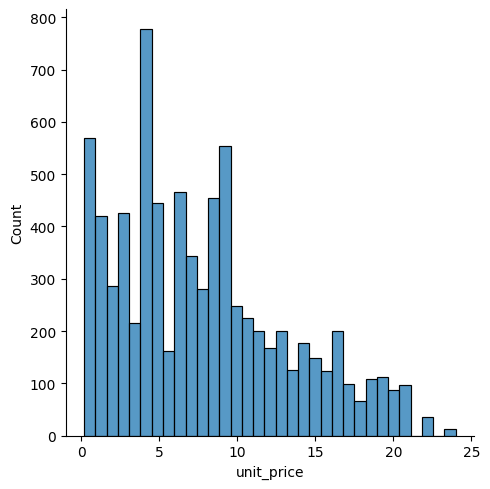

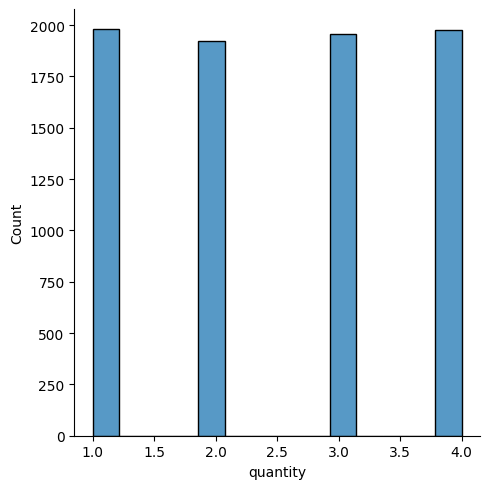

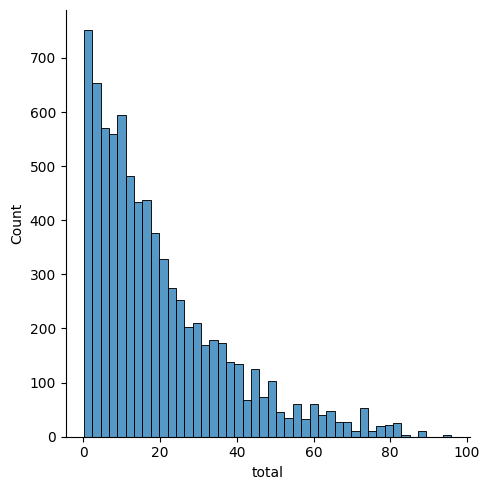

In [35]:
displot(sales, ['unit_price', 'quantity', 'total'])

In [49]:
categorical_columns= sales.dtypes[sales.dtypes=='object']
print(categorical_columns)

transaction_id    object
timestamp         object
product_id        object
category          object
customer_type     object
payment_type      object
dtype: object


In [51]:
unique_values = sales['category'].unique()
print(unique_values)

['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']


<Axes: xlabel='category', ylabel='Count'>

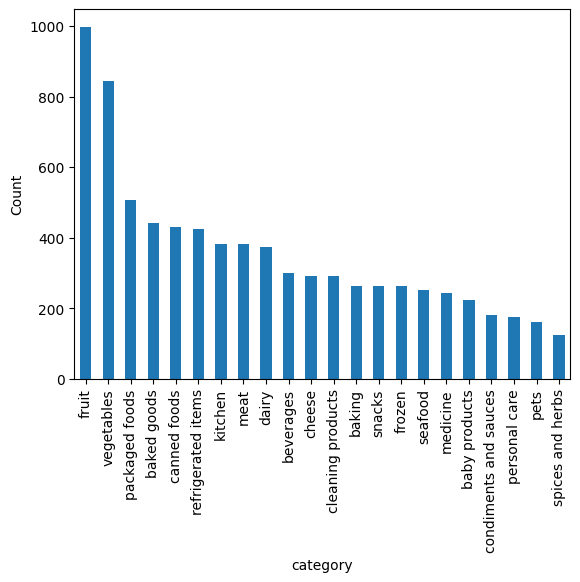

In [64]:
sales['category'].value_counts().plot(kind='bar', xlabel='category', ylabel='Count')

<Axes: xlabel='type', ylabel='Count'>

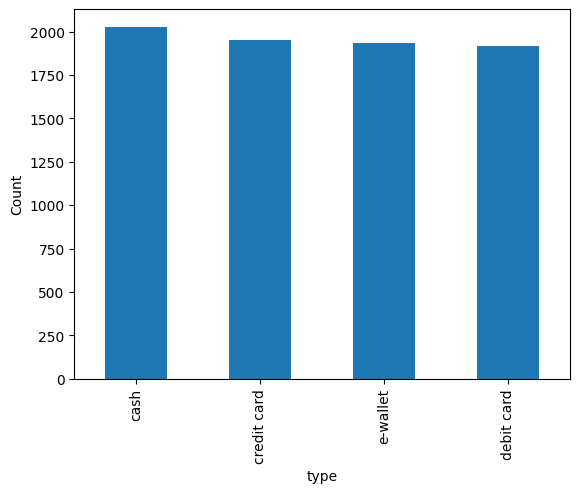

In [65]:
sales['payment_type'].value_counts().plot(kind='bar', xlabel='type', ylabel='Count')

In [ ]:
sales.groupby(sales["datetime"].dt.hour)["value"].mean().plot(kind='bar')

In [5]:
stock= pd.read_csv('sensor_stock_levels.csv')

stock.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [12]:
# convert datetime feature to datetime data type
for f in ['timestamp']:
    stock[f] = pd.to_datetime(stock[f], format='%Y-%m-%d %H:%M:%S')

stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           15000 non-null  int64         
 1   id                   15000 non-null  object        
 2   timestamp            15000 non-null  datetime64[ns]
 3   product_id           15000 non-null  object        
 4   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 586.1+ KB


In [7]:
temp= pd.read_csv('sensor_storage_temperature.csv')

temp.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [13]:
# convert datetime feature to datetime data type
for f in ['timestamp']:
    temp[f] = pd.to_datetime(temp[f], format='%Y-%m-%d %H:%M:%S')

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   23890 non-null  int64         
 1   id           23890 non-null  object        
 2   timestamp    23890 non-null  datetime64[ns]
 3   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 746.7+ KB


converting time to hourly basis

In [14]:
import pandas as pd
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None, column: str = None):
    dummy = data.copy()
    new_ts = dummy[column].tolist()
    new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
    new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
    dummy[column] = new_ts
    return dummy

sales = convert_timestamp_to_hourly(sales, 'timestamp')
sales.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [15]:
stock = convert_timestamp_to_hourly(stock, 'timestamp')
stock.head()

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [16]:
temp = convert_timestamp_to_hourly(temp, 'timestamp')
temp.head()

,Unnamed: 0,id,timestamp,temperature
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [17]:
sales_agg = sales.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11


In [18]:
stock_agg = stock.groupby(['timestamp', 'product_id']).agg({'estimated_stock_pct': 'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


In [19]:
temp_agg = temp.groupby(['timestamp']).agg({'temperature': 'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


This gives us the average temperature of the storage facility where the produce is stored in the warehouse by unique hours during the week. Now, we are ready to merge our data. We will use the stock_agg table as our base table, and we will merge our other 2 tables onto this.

In [20]:
merged_df = stock_agg.merge(sales_agg, on=['timestamp', 'product_id'], how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN


In [21]:
merged_df = merged_df.merge(temp_agg, on='timestamp', how='left')
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,-0.02885


We can see from the .info() method that we have some null values. These need to be treated before we can build a predictive model. The column that features some null values is quantity. We can assume that if there is a null value for this column, it represents that there were 0 sales of this product within this hour. So, lets fill this columns null values with 0, however, we should verify this with the client, in order to make sure we're not making any assumptions by filling these null values with

In [22]:
merged_df['quantity'] = merged_df['quantity'].fillna(0)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 508.4+ KB


We can combine some more features onto this table too, including category and unit_price.

In [23]:
product_categories = sales[['product_id', 'category']]
product_categories = product_categories.drop_duplicates()

product_price = sales[['product_id', 'unit_price']]
product_price = product_price.drop_duplicates()

merged_df = merged_df.merge(product_categories, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets


In [24]:
merged_df = merged_df.merge(product_price, on="product_id", how="left")
merged_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,-0.02885,pets,8.19


In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   temperature          10845 non-null  float64       
 5   category             10845 non-null  object        
 6   unit_price           10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


In [26]:
merged_df.drop(columns=['product_id'], inplace=True)
merged_df.head()

,timestamp,estimated_stock_pct,quantity,temperature,category,unit_price
0,2022-03-01 09:00:00,0.89,3.0,-0.02885,kitchen,11.19
1,2022-03-01 09:00:00,0.14,3.0,-0.02885,vegetables,1.49
2,2022-03-01 09:00:00,0.67,0.0,-0.02885,baby products,14.19
3,2022-03-01 09:00:00,0.82,0.0,-0.02885,beverages,20.19
4,2022-03-01 09:00:00,0.05,0.0,-0.02885,pets,8.19


In [27]:
merged_df['timestamp_day_of_month'] = merged_df['timestamp'].dt.day
merged_df['timestamp_day_of_week'] = merged_df['timestamp'].dt.dayofweek
merged_df['timestamp_hour'] = merged_df['timestamp'].dt.hour
merged_df.drop(columns=['timestamp'], inplace=True)
merged_df.head()

,estimated_stock_pct,quantity,temperature,category,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour
0,0.89,3.0,-0.02885,kitchen,11.19,1,1,9
1,0.14,3.0,-0.02885,vegetables,1.49,1,1,9
2,0.67,0.0,-0.02885,baby products,14.19,1,1,9
3,0.82,0.0,-0.02885,beverages,20.19,1,1,9
4,0.05,0.0,-0.02885,pets,8.19,1,1,9


In [28]:
merged_df = pd.get_dummies(merged_df, columns=['category'])
merged_df.head()

,estimated_stock_pct,quantity,temperature,unit_price,timestamp_day_of_month,timestamp_day_of_week,timestamp_hour,category_baby products,category_baked goods,category_baking,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,0.89,3.0,-0.02885,11.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.14,3.0,-0.02885,1.49,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.67,0.0,-0.02885,14.19,1,1,9,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.82,0.0,-0.02885,20.19,1,1,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.05,0.0,-0.02885,8.19,1,1,9,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**MODELLING**

In [29]:
X = merged_df.drop(columns=['estimated_stock_pct'])
y = merged_df['estimated_stock_pct']
print(X.shape)
print(y.shape)


(10845, 28)
(10845,)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

model = RandomForestRegressor()
scaler = StandardScaler()

  # Create training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

  # Scale X data, we scale the data because it helps the algorithm to converge
  # and helps the algorithm to not be greedy with large values
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

  # Train model
trained_model = model.fit(X_train, y_train)

  # Generate predictions on test sample
y_pred = trained_model.predict(X_test)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
print(mae)


0.23615678283905747


In [ ]:
merged_df.describe()

In [63]:
print('Train Score: ', trained_model.score(X_train, y_train))
print('Test Score: ', trained_model.score(X_test , y_test))

Train Score:  0.8109533340873534
Test Score:  -0.1622408727718081


In [64]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(r2)

-0.1622408727718081


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

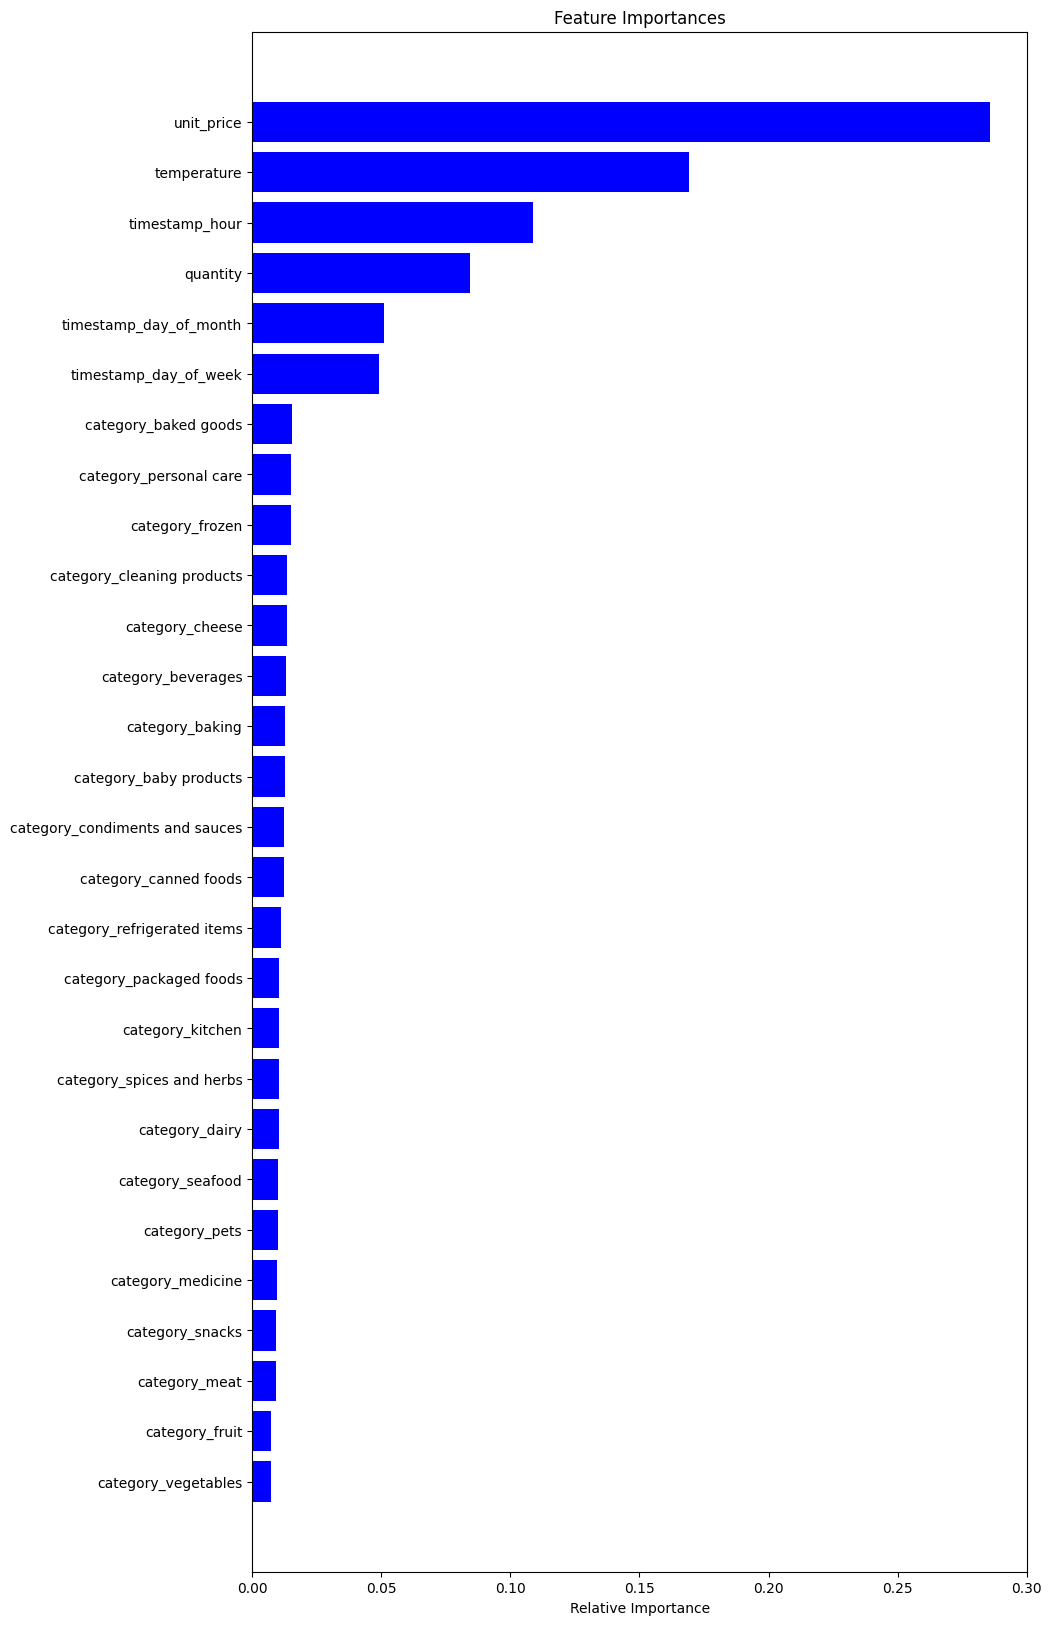

In [65]:
features = [i.split("__")[0] for i in X.columns]
importances = model.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

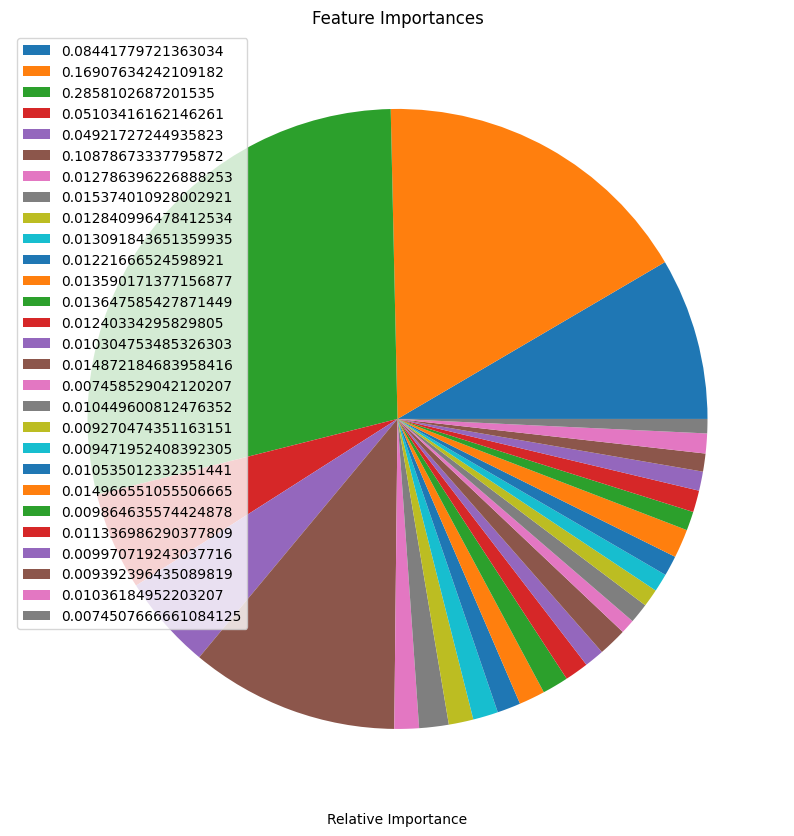

In [84]:

importances = model.feature_importances_

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.pie(importances)
plt.legend((importances), loc="best")
plt.xlabel('Relative Importance')

plt.show()

This feature importance visualisation tells us:

The product categories were not that important
The unit price and temperature were important in predicting stock
The hour of day was also important for predicting stock
With these insights, we can now report this back to the business

In [33]:
performance_df = pd.DataFrame(columns = ['Model','R2_train','R2_test','RMSE_train','RMSE_test','Remarks'])

In [35]:
# Creating a user defined function to predict and to store metrics of train and test
from sklearn.metrics import mean_squared_error , r2_score

def model_performance(model,name):
 global performance_df

 pred_train = model.predict(X_train)
 pred_test = model.predict(X_test)

 rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
 rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
 r2_train = r2_score(y_train , pred_train)
 r2_test = r2_score(y_test , pred_test)

 def remark(r2_train,r2_test,rmse_test):
  if abs(r2_train - r2_test) > 0.1 or rmse_test > 7.5:
   return 'Over Fit'

  else:
   return 'Good Fit'

 performance_df = performance_df.append({'Model':name,
 'R2_train':r2_train,
'R2_test':r2_test,
'RMSE_train':rmse_train,
'RMSE_test':rmse_test,
'Remarks':remark(r2_train,r2_test,rmse_test)} , ignore_index=True)

In [36]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor().fit(X_train , y_train)
model_performance(model_knn , 'KNN')

<ipython-input-35-7dece739d1b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({'Model':name,


In [37]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
model_ab = AdaBoostRegressor().fit(X_train , y_train)
model_performance(model_ab , 'AdaBoost')

<ipython-input-35-7dece739d1b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({'Model':name,


In [40]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor().fit(X_train , y_train)
model_performance(model_gb , 'Gradient Boosting')


<ipython-input-35-7dece739d1b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({'Model':name,


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(r2)

-0.15701065416626614


In [41]:
# Xgboost-RandomForest
from xgboost import XGBRFRegressor
model_xgbrf = XGBRFRegressor().fit(X_train,y_train)
model_performance(model_xgbrf , 'XGBoost Random Forest')

<ipython-input-35-7dece739d1b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({'Model':name,


In [42]:
# Neural network
from sklearn.neural_network import MLPRegressor
model_nn = MLPRegressor().fit(X_train , y_train)
model_performance(model_nn , 'Neural Network')

<ipython-input-35-7dece739d1b8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  performance_df = performance_df.append({'Model':name,


In [43]:
# Creating a user defined function to highlight the rows which are good fit
def highlight_row(df):
 color_green = ['background-color : lightgreen']*len(df)
 color_white = ['background-color : white']*len(df)

 if df['Remarks'] == 'Good Fit':
   return color_green

 else:
   return color_white

In [44]:
performance_df.style.apply(highlight_row,axis = 1)


,Model,R2_train,R2_test,RMSE_train,RMSE_test,Remarks
0,KNN,0.187090,-0.213975,0.238787,0.290280,Over Fit
1,AdaBoost,0.003682,0.001354,0.264356,0.263280,Good Fit
2,Gradient Boosting,0.041468,-0.008984,0.259294,0.264639,Good Fit
3,XGBoost Random Forest,0.039617,-0.005470,0.259544,0.264178,Good Fit
4,Neural Network,0.066890,-0.073366,0.255833,0.272952,Over Fit
